# TASK 1 : Prediction using Supervised ML

## -By Shailee R. Desai (Data Science and Business Analytics Intern @ TSF)

### Linear Regression with Python Scikit Learn

To use Python Scikit-Learn Library for Machine Learning. We will start with simple linear regression involving two variables.

### Exploratory Data Analysis

In [1]:
# Importing all libraries required in this notebook
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from url (remote link)
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Here, we have two variables named Hours and Scores. We can see first 5 records of our dataset.

In [3]:
#Checking the Data type
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
#Renaming the column for better understanding
df = df.rename(columns={"Hours": "Study_Hours"})
df.head(5)

,Study_Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Total number of rows and columns
df.shape

(25, 2)

In [6]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 2)


In [7]:
# Finding the null values.
print(df.isnull().sum())

Study_Hours    0
Scores         0
dtype: int64


,Study_Hours,Scores
Study_Hours,1.000000,0.976191
Scores,0.976191,1.000000


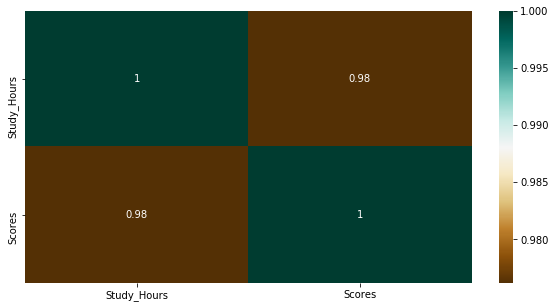

In [8]:
# Finding the relations between the variables.
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

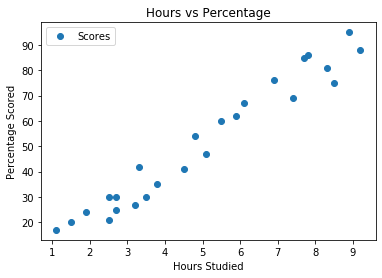

In [9]:
# Plotting the distribution of scores
df.plot(x='Study_Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

### Preparing the data

In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Model Building

In [12]:
from sklearn.linear_model import LinearRegression  
LR = LinearRegression()  
LR.fit(X_train, y_train) 

print("Model Building complete.")

Model Building complete.


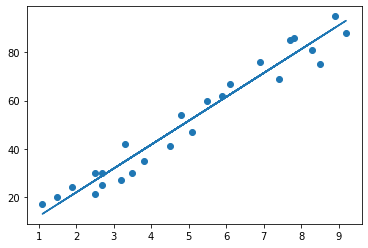

In [13]:
# Plotting the regression line
line = LR.coef_*X+LR.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Predictions

In [14]:
print(X_test) # Testing data - In Hours
y_pred = LR.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Model Evaluation

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [17]:
# You can also test with your own data
hours = [[9.25]]
own_pred = LR.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### Accuracy of Model

In [18]:
print(LR.score(X_test, y_test))

0.9454906892105356


### THANK YOU!!!